Each sample in the train and test set has the following information:

- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)

We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.


More details about the competition here:
https://www.kaggle.com/c/nlp-getting-started

In [1]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
train = pd.read_csv(f"data/train.csv")
test = pd.read_csv(f"data/test.csv")

<IPython.core.display.Javascript object>

In [3]:
train.head().T

,0,1,2,3,4
id,1,4,5,6,7
keyword,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN
text,Our Deeds are the Reason of this #earthquake M...,Forest fire near La Ronge Sask. Canada,All residents asked to 'shelter in place' are ...,"13,000 people receive #wildfires evacuation or...",Just got sent this photo from Ruby #Alaska as ...
target,1,1,1,1,1


<IPython.core.display.Javascript object>

In [4]:
test.head().T

,0,1,2,3,4
id,0,2,3,9,11
keyword,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN
text,Just happened a terrible car crash,"Heard about #earthquake is different cities, s...","there is a forest fire at spot pond, geese are...",Apocalypse lighting. #Spokane #wildfires,Typhoon Soudelor kills 28 in China and Taiwan


<IPython.core.display.Javascript object>

In [5]:
def create_corpus(df, target):
    """
    Create corpus based on the target.
    """
    corpus = []

    for x in df[df["target"] == target].text.str.split():
        for i in x:
            corpus.append(i)
    return corpus

<IPython.core.display.Javascript object>

Find stopwords in disaster text corpus 

In [6]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

<IPython.core.display.Javascript object>

In [8]:
from collections import defaultdict

<IPython.core.display.Javascript object>

In [9]:
corpus0 = create_corpus(df=train, target=0)
corpus1 = create_corpus(df=train, target=1)

d0 = defaultdict(int)
for word in corpus0:
    if word in stop:
        d0[word] += 1

d1 = defaultdict(int)
for word in corpus1:
    if word in stop:
        d1[word] += 1

<IPython.core.display.Javascript object>

In [10]:
top0 = sorted(d0.items(), key=lambda x: x[1], reverse=True)[:10]
top1 = sorted(d1.items(), key=lambda x: x[1], reverse=True)[:10]

<IPython.core.display.Javascript object>

In [11]:
x0, y0 = zip(*top0)
x1, y1 = zip(*top1)

<IPython.core.display.Javascript object>

<BarContainer object of 10 artists>

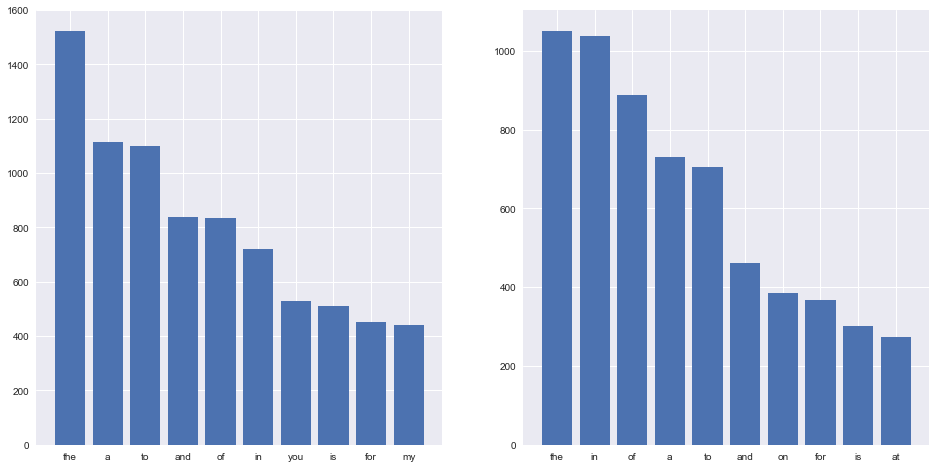

<IPython.core.display.Javascript object>

In [12]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.bar(x0, y0)
plt.subplot(1, 2, 2)
plt.bar(x1, y1)

Let's look at the punctuation in the corpus

In [13]:
import string

<IPython.core.display.Javascript object>

In [14]:
punc0 = defaultdict(int)
for word in corpus0:
    if word in string.punctuation:
        punc0[word] += 1

punc1 = defaultdict(int)
for word in corpus1:
    if word in string.punctuation:
        punc1[word] += 1

<IPython.core.display.Javascript object>

<BarContainer object of 10 artists>

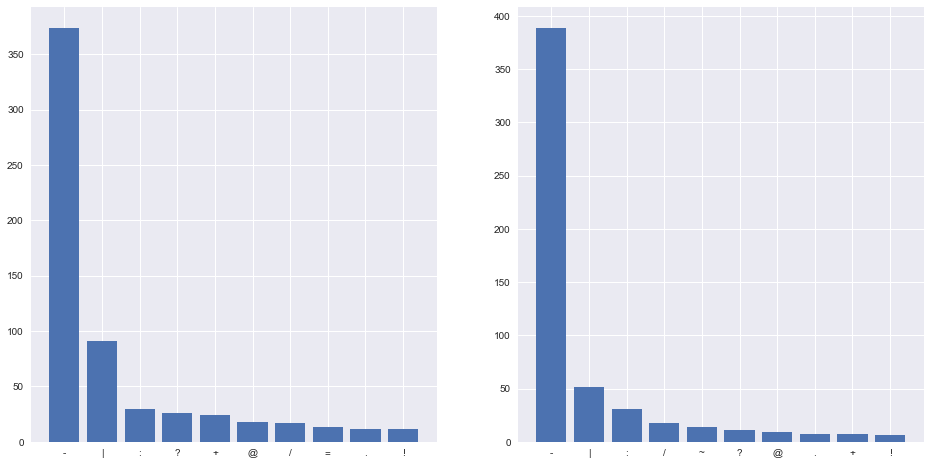

<IPython.core.display.Javascript object>

In [15]:
top0 = sorted(punc0.items(), key=lambda x: x[1], reverse=True)[:10]
top1 = sorted(punc1.items(), key=lambda x: x[1], reverse=True)[:10]

x0, y0 = zip(*top0)
x1, y1 = zip(*top1)

plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.bar(x0, y0)
plt.subplot(1, 2, 2)
plt.bar(x1, y1)

Remove URLs and HTML

In [16]:
import re


def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

<IPython.core.display.Javascript object>

In [17]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

<IPython.core.display.Javascript object>

Remove punctuation

In [18]:
def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

<IPython.core.display.Javascript object>

In [19]:
train["text"] = train.text.map(lambda x: remove_URL(x))
train["text"] = train.text.map(lambda x: remove_html(x))
train["text"] = train.text.map(lambda x: remove_emoji(x))
train["text"] = train.text.map(lambda x: remove_punct(x))

<IPython.core.display.Javascript object>

Remove stopwords

In [20]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

<IPython.core.display.Javascript object>

In [21]:
train["text"] = train["text"].map(remove_stopwords)

<IPython.core.display.Javascript object>

Let's plot a WordCloud for each of the target classes.

In [22]:
from wordcloud import WordCloud

<IPython.core.display.Javascript object>

In [23]:
corpus0 = create_corpus(df=train, target=0)
corpus1 = create_corpus(df=train, target=1)

<IPython.core.display.Javascript object>

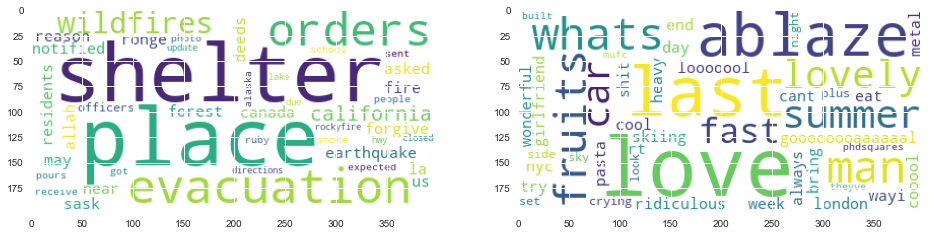

<IPython.core.display.Javascript object>

In [24]:
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:50])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus1[:50])
)

plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(word_cloud1)
plt.subplot(1, 2, 2)
plt.imshow(word_cloud0)

Stemming. Bundling together words of same root.

In [25]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()


def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]

    return " ".join(text)

<IPython.core.display.Javascript object>

If we would stem..

In [26]:
train["text"] = train["text"].map(stemming)

<IPython.core.display.Javascript object>

In [27]:
corpus0 = create_corpus(df=train, target=0)
corpus1 = create_corpus(df=train, target=1)

<IPython.core.display.Javascript object>

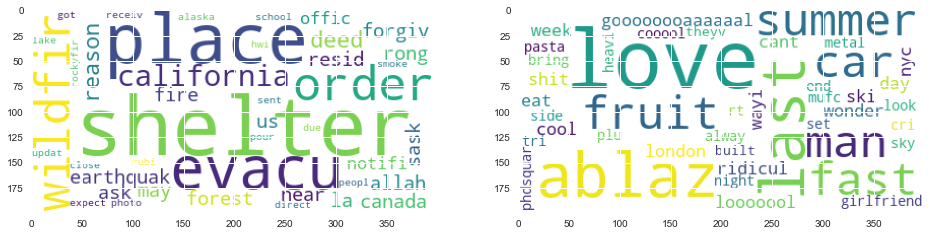

<IPython.core.display.Javascript object>

In [28]:
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:50])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus1[:50])
)

plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(word_cloud1)
plt.subplot(1, 2, 2)
plt.imshow(word_cloud0)